[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Amyssjj/Agent_Influcencer/blob/main/Agent_Youtube_Insights_Fetcher.ipynb)

### **From Natural Language to Key Insights: The 3-Steps YouTube Data Pipeline**

##### **Motivation**
<a name="Motivation"></a>

In such a fast-paced world where information on the internet is exploding, staying connecte, forming my own perspective, and staying sharp is incredibly challenging. Yet, with full passion for learning and growth, I’m always striving to improve.


<hr>        

In [88]:
## import langfun and related packages
import langfun as lf
import pyglove as pg
from langfun.core.structured import function_generation
import pandas as pd
import json
from typing import Literal, Annotated
from datetime import datetime
import json
from IPython.display import display, JSON, HTML, Image


## optional, this is where setup the API_KEY
from dotenv import load_dotenv
## load the keys
load_dotenv(dotenv_path='../../.env')  # This loads your .env file
import os

youtube_key = os.environ.get('YOUTUBE_KEY')
claude_key = os.environ.get('CLAUDE_API_KEY')
gemini_key = os.environ.get('GEMINI_API_KEY')
openai_key = os.environ.get('OPENAI_API_KEY')

## build the LLM crew
lm_claude = lf.llms.Claude35Sonnet(api_key=claude_key, temperature=0.0)
lm_openai = lf.llms.Gpt4o(api_key=openai_key, temperature=0.6)
lm_gemini = lf.llms.GeminiExp_20241114(api_key=gemini_key, temperature=0.6)


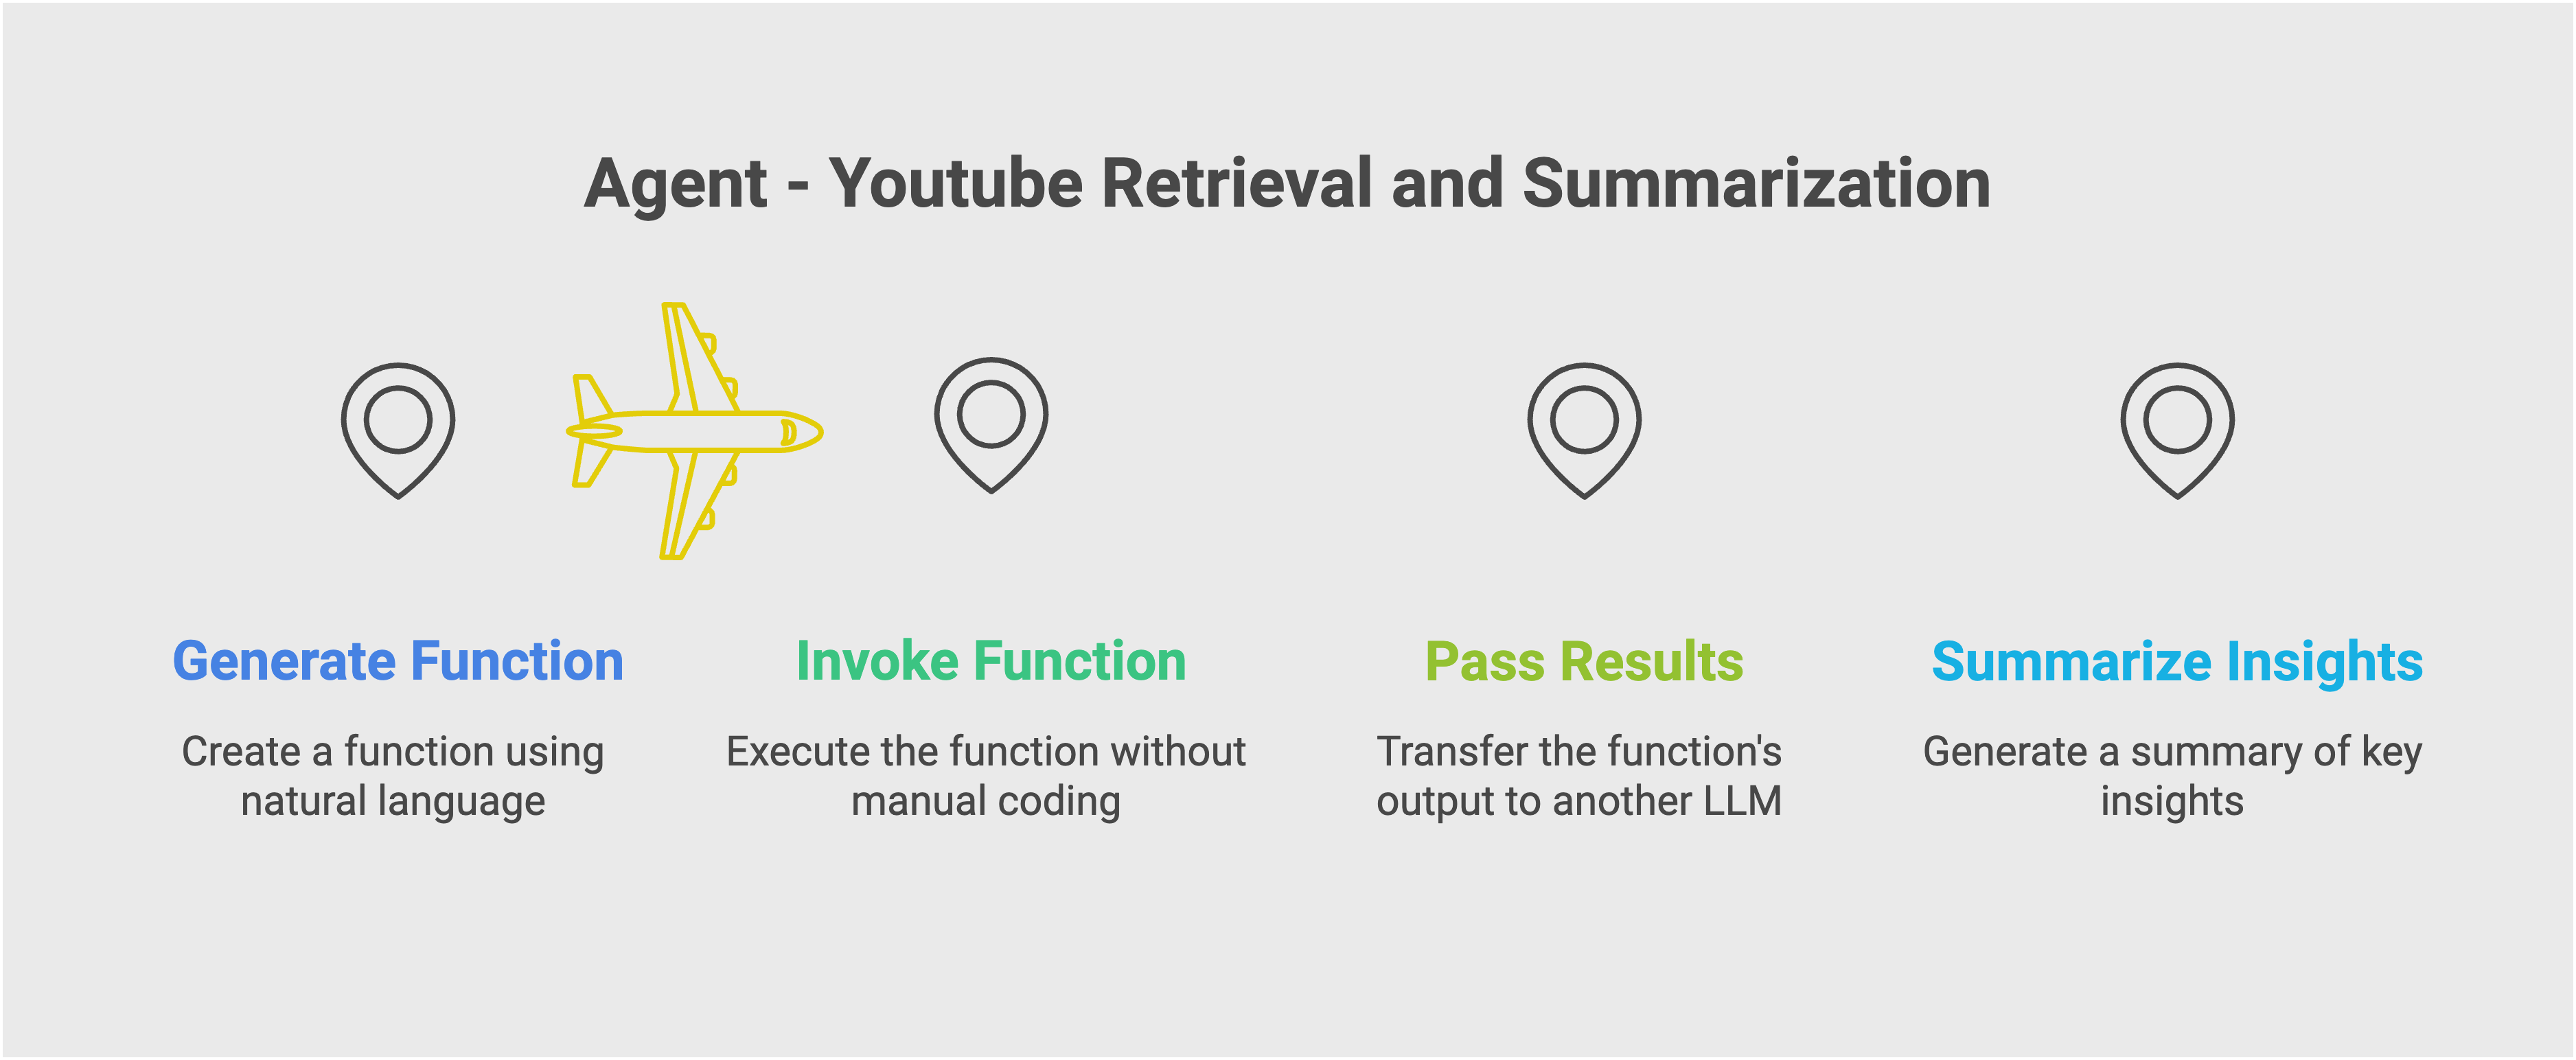

In [93]:
img_path = './_static/agent_youtube_helper.png'
display(Image(filename=img_path))

#### **Step1: Use LLM to generate a function—described purely in natural language.**

In [17]:
@function_generation.function_gen(lm=lm_claude, cache_filename='./utils/functions_cache.json')
def youtube_fetcher(API_KEY:str, youtube_id:str) -> dict:
    """Retreve the youtube video basic info, caption, and comments through API

    Returns:
    The video basic info, caption, and comments
"""

In [58]:
@function_generation.function_gen(lm=lm_claude, cache_filename='./utils/functions_cache.json')
def display_pretty_json(data):
    """
    Display JSON data in a nicely formatted HTML table with proper styling.
    Convert the data to a formatted JSON string.
    Create HTML with embedded CSS for styling, align left

    Args:
        data (dict): The JSON/dictionary data to display
    
    Returns HTML()
    """

#### **Step2: Invoke that function directly, NO Manual CODING involved.**

In [18]:
## function has been cached, so it will be able to reuse next time without additional calling from LLM.
result = youtube_fetcher(API_KEY = youtube_key,  youtube_id='jIm2T7h_a0M')

In [26]:
print(result.keys())

dict_keys(['basic_info', 'captions', 'comments'])


In [62]:
display_pretty_json(result['basic_info'])

#### **Step3: Produce key insights from another LLM**

In [75]:
my_question = '''what's the key point and insights in this content:{{content}}, how's users feeling and sentiment?'''

class insights(pg.Object):
    key_points: Annotated[str, "Please be specific and using bullet point to layout"]  
    users_feeling: str
    users_sentiment: str

fast_take = lf.query(prompt=my_question, content=result, schema=insights, lm=lm_openai)

In [81]:
fast_take

insights(key_points='\n  - The video discusses recent developments in AI, including OpenAI\'s "Next 12 Days," Genie 2, and the challenges of AI reliability.\n  - It highlights important AI papers, such as the Bag of Heuristics and Procedural Knowledge papers, and their implications.\n  - The content covers the ongoing AI hallucination problem and potential solutions involving better agent and function calling.\n  - There is a focus on the potential of Genie 2 in enhancing interactive environments and its role in AI gaming and web applications.\n  - The video offers a critical analysis of AI advancements without unnecessary hype, maintaining objectivity.\n  ', users_feeling='\n  - Users appreciate the objective and non-hyped approach of the channel.\n  - There is excitement about upcoming AI developments and announcements from OpenAI.\n  - Some users express skepticism about the feasibility of solving the AI hallucination problem.\n  - Many users are enthusiastic about the future potential of AI, particularly in creative and interactive applications.\n  ', users_sentiment="\n  - Overall positive sentiment, with users expressing excitement and appreciation for the content.\n  - Some skepticism and caution regarding the challenges and limitations of current AI technologies.\n  - Users generally value the channel's integrity and straightforward analysis of AI news.\n  ")

In [92]:
from IPython.display import Markdown

Markdown(f"""
##### **Key Points**
{fast_take.key_points}

##### **User Feelings**
{fast_take.users_feeling}

##### **User Sentiment**
{fast_take.users_sentiment}
""")


##### **Key Points**

  - The video discusses recent developments in AI, including OpenAI's "Next 12 Days," Genie 2, and the challenges of AI reliability.
  - It highlights important AI papers, such as the Bag of Heuristics and Procedural Knowledge papers, and their implications.
  - The content covers the ongoing AI hallucination problem and potential solutions involving better agent and function calling.
  - There is a focus on the potential of Genie 2 in enhancing interactive environments and its role in AI gaming and web applications.
  - The video offers a critical analysis of AI advancements without unnecessary hype, maintaining objectivity.
  

##### **User Feelings**

  - Users appreciate the objective and non-hyped approach of the channel.
  - There is excitement about upcoming AI developments and announcements from OpenAI.
  - Some users express skepticism about the feasibility of solving the AI hallucination problem.
  - Many users are enthusiastic about the future potential of AI, particularly in creative and interactive applications.
  

##### **User Sentiment**

  - Overall positive sentiment, with users expressing excitement and appreciation for the content.
  - Some skepticism and caution regarding the challenges and limitations of current AI technologies.
  - Users generally value the channel's integrity and straightforward analysis of AI news.
  


#### Appendix

In [54]:
## Using this tool,  we could know the python code generated for execution
with lf.use_settings(debug=True):
    print(youtube_fetcher.source())

```python
def youtube_fetcher(API_KEY: str, youtube_id: str) -> dict:
    """Retrieve the youtube video basic info, caption, and comments through API.
    
    Args:
        API_KEY: YouTube Data API v3 key
        youtube_id: YouTube video ID
        
    Returns:
        dict: Video information containing:
            - basic_info: Title, description, view count, etc.
            - captions: Video captions/subtitles if available
            - comments: Top level comments on the video
            
    Raises:
        HttpError: If the API request fails
        ValueError: If API_KEY or youtube_id is invalid
    """
    from googleapiclient.discovery import build
    from googleapiclient.errors import HttpError
    
    if not API_KEY or not youtube_id:
        raise ValueError("API_KEY and youtube_id must not be empty")
        
    try:
        # Initialize YouTube API client
        youtube = build('youtube', 'v3', developerKey=API_KEY)
        
        # Get video basic info
      